In [1]:
from econ_regime.econ_regime import *
from price.macro_info import get_econ_info
from price.price_processing import *
from strategy.factors.momentum import *
from strategy.factors.volatility import *
from strategy.factors.beta import *
from strategy.optimize.cross_sectional import *
from backtest.metric import *

import pandas as pd
import numpy as np
import statsmodels.api as sm
import bs4 as bs
import requests
import datetime as dt
import pickle5 as pickle

In [2]:
benchmark = pd.DataFrame({'SPY': 
                        yf.download(
                            'SPY', 
                            start='2000-01-01', 
                            end='2022-12-31')
                            ['Adj Close']
                            }
                        )

[*********************100%***********************]  1 of 1 completed


In [3]:
#benchmark.loc['2012-01-31':,].pct_change().fillna(0).to_csv('result/sp500_daily_rets.csv')

AxesSubplot(0.125,0.2;0.775x0.68)
Total Returns: 358.42%
CAGR: 12.41%
Annualized Volatility: 17.06%
Skewness: -0.56
Kurtosis: 13.44
Max Drawdown: -33.72%
Max Drawdown Duration: 361.00 days
Annualized Sharp Ratio: 0.49
Annualized Sortino Ratio: 0.85
Annualized Calmar Ratio: 0.37
Annualized VaR: -0.03
Annualized VaR Ratio: 0.02
Annualized CVaR: -0.04
Annualized CVaR Ratio: 0.01
Annualized hit Ratio: 0.55
Annualized GtP Ratio: 0.95


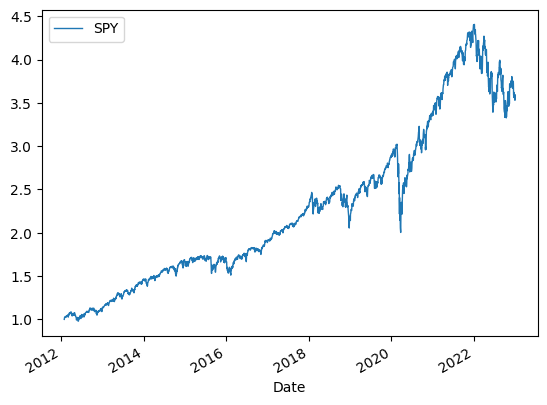

In [4]:
### sp500의 누적수익률 확인
print((1 + benchmark.loc['2012-01-31':,].pct_change().fillna(0)).cumprod().plot(lw=1))
Metric(portfolio=(1 + benchmark.loc['2012-01-31':,].pct_change().fillna(0)).cumprod(), freq='day').print_report()

In [5]:
### 시황별 수익률
regime_df = business_cycle(recession=True)
regime_df = regime_df.loc['2000':'2022-12-01',:]
regime_df.index = benchmark.resample('M').last().index

fr_df = factor_with_regime(regime_df, benchmark.resample('M').last().pct_change().fillna(0), 'sp500_rets')#.dropna()
check_factor_with_regime(fr_df, 'sp500_rets', 'month', plot=False)

sp500_rets with deflation
Total Returns: 51.81%
CAGR: -2.82%
Annualized Volatility: 10.94%
Skewness: -0.57
Kurtosis: 6.85
Max Drawdown: -64.40%
Max Drawdown Duration: 8096.00 days
Annualized Sharp Ratio: -0.62
Annualized Sortino Ratio: -0.72
Annualized Calmar Ratio: -0.04
Annualized VaR: -0.11
Annualized VaR Ratio: -0.02
Annualized CVaR: -0.13
Annualized CVaR Ratio: -0.01
Annualized hit Ratio: 0.47
Annualized GtP Ratio: 0.84

sp500_rets with inflation
Total Returns: 94.04%
CAGR: -0.27%
Annualized Volatility: 4.10%
Skewness: -0.23
Kurtosis: 45.89
Max Drawdown: -12.95%
Max Drawdown Duration: 153.00 days
Annualized Sharp Ratio: -1.04
Annualized Sortino Ratio: -1.10
Annualized Calmar Ratio: -0.02
Annualized VaR: -0.05
Annualized VaR Ratio: -0.00
Annualized CVaR: -0.08
Annualized CVaR Ratio: -0.00
Annualized hit Ratio: 0.50
Annualized GtP Ratio: 0.85

sp500_rets with recovery
Total Returns: 347.67%
CAGR: 5.57%
Annualized Volatility: 6.42%
Skewness: 1.91
Kurtosis: 9.19
Max Drawdown: -7.95%
M

In [6]:
regime_df.to_csv('result/regime_df.csv')

In [ ]:
## recession일 때는 deflation 이후에 recovery와 expansion이 나타난다.
regime_df[regime_df.recession==1]